# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from datetime import datetime
from scipy.stats import linregress

# Import API key
from hw6_api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [6]:
new_cities = []
lat = []
lng = []
date = []
temp = []
humidity = []
clouds = []
wind = []
country = []
record = 1

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        date.append(response['dt'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        print(f"Processing Record {record} | {city}")
        record += 1
        new_cities.append(city)
    except:
        print("City not found. Skipping...")

Processing Record 1 | rikitea
Processing Record 2 | gat
Processing Record 3 | ginda
Processing Record 4 | las cruces
Processing Record 5 | sidi ali
Processing Record 6 | albany
City not found. Skipping...
Processing Record 7 | nantucket
Processing Record 8 | sao filipe
Processing Record 9 | yining
Processing Record 10 | port hardy
Processing Record 11 | alyangula
Processing Record 12 | mataura
Processing Record 13 | quatre cocos
Processing Record 14 | jamestown
Processing Record 15 | hithadhoo
Processing Record 16 | apulia
Processing Record 17 | lebu
Processing Record 18 | nikolskoye
Processing Record 19 | hermanus
Processing Record 20 | yellowknife
Processing Record 21 | qasigiannguit
Processing Record 22 | butaritari
City not found. Skipping...
Processing Record 23 | yar-sale
Processing Record 24 | thinadhoo
Processing Record 25 | laguna
Processing Record 26 | bluff
Processing Record 27 | kapaa
Processing Record 28 | cape town
Processing Record 29 | qaanaaq
Processing Record 30 | vai

Processing Record 236 | tombouctou
Processing Record 237 | talavera
City not found. Skipping...
Processing Record 238 | taybad
Processing Record 239 | waddan
Processing Record 240 | zhigansk
Processing Record 241 | plovdiv
Processing Record 242 | salym
Processing Record 243 | nelson bay
City not found. Skipping...
Processing Record 244 | malindi
Processing Record 245 | trairi
Processing Record 246 | viseu
Processing Record 247 | lucea
Processing Record 248 | sayyan
Processing Record 249 | san jeronimo
Processing Record 250 | kapatagan
Processing Record 251 | padang
Processing Record 252 | marsa matruh
Processing Record 253 | bengkulu
Processing Record 254 | nome
Processing Record 255 | coquimbo
Processing Record 256 | guerrero negro
Processing Record 257 | tezu
Processing Record 258 | bongandanga
Processing Record 259 | ust-kut
Processing Record 260 | pitimbu
City not found. Skipping...
Processing Record 261 | arraial do cabo
Processing Record 262 | rawson
Processing Record 263 | souil

Processing Record 474 | pringsewu
Processing Record 475 | behbahan
Processing Record 476 | bembereke
Processing Record 477 | bilibino
Processing Record 478 | monrovia
City not found. Skipping...
Processing Record 479 | sri aman
Processing Record 480 | berlevag
Processing Record 481 | cartagena del chaira
Processing Record 482 | whitehorse
Processing Record 483 | kirkwall
City not found. Skipping...
Processing Record 484 | hami
Processing Record 485 | sidhi
Processing Record 486 | zabol
Processing Record 487 | groningen
Processing Record 488 | nerchinskiy zavod
City not found. Skipping...
Processing Record 489 | pangody
Processing Record 490 | sioux lookout
Processing Record 491 | mehamn
Processing Record 492 | gizo
Processing Record 493 | punta gorda
Processing Record 494 | foam lake
Processing Record 495 | poum
Processing Record 496 | elbistan
Processing Record 497 | la solana
Processing Record 498 | bilma
Processing Record 499 | ca mau
Processing Record 500 | tharad
Processing Record

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_dict = {
    "City": new_cities,
    "Cloudiness": clouds,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": temp,
    "Wind Speed": wind
}
weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City          591
Cloudiness    591
Country       591
Date          591
Humidity      591
Lat           591
Lng           591
Max Temp      591
Wind Speed    591
dtype: int64

In [8]:
weather_data['Date'] = pd.to_datetime(weather_data['Date'], unit='s')
weather_data.to_csv(output_data_file)
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,rikitea,64,PF,2020-03-21 17:52:55,80,-23.12,-134.97,78.58,11.36
1,gat,40,IL,2020-03-21 17:52:56,76,31.61,34.76,55.00,6.93
2,ginda,67,IN,2020-03-21 17:52:56,79,30.69,78.49,48.52,3.53
3,las cruces,1,US,2020-03-21 17:52:50,47,32.31,-106.78,61.00,10.29
4,sidi ali,98,DZ,2020-03-21 17:52:56,81,36.10,0.42,54.46,2.51


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

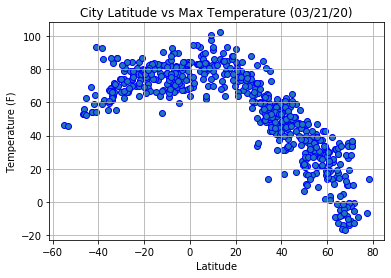

In [9]:
x_values = weather_data['Lat']
y_values = weather_data['Max Temp']

fig1 = plt.figure()
plt.scatter(x_values,y_values,linewidths='1',edgecolors='b')
plt.title('City Latitude vs Max Temperature (03/21/20)')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid()
plt.show()

fig1.savefig("LatVsTemp.png")

The code is ploting each city's latitudes and maximum temperature on the specified date to show the relationship between the two. The above figure shows that temperature is usually higher the closer latitude is to 0.

#### Latitude vs. Humidity Plot

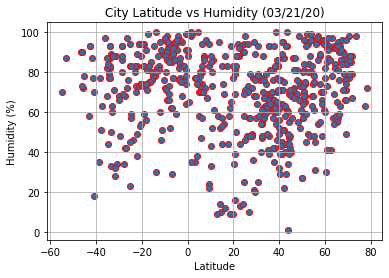

In [10]:
x_values = weather_data['Lat']
y_values = weather_data['Humidity']

fig2 = plt.figure()

plt.scatter(x_values,y_values,linewidths='1',edgecolors='r')
plt.title('City Latitude vs Humidity (03/21/20)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.show()

fig2.savefig("LatVsHum.png")

The code is ploting each city's latitude and humidity on the specified date to show their relationship. The above figure shows that humidity is not very dependent on latitude.

#### Latitude vs. Cloudiness Plot

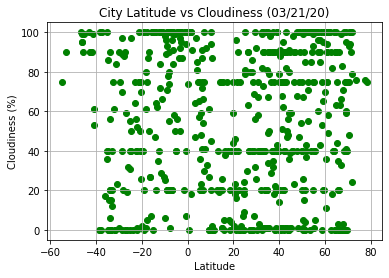

In [11]:
x_values = weather_data['Lat']
y_values = weather_data['Cloudiness']

fig3 = plt.figure()

plt.scatter(x_values,y_values, c='g', linewidths='1')
plt.title('City Latitude vs Cloudiness (03/21/20)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.show()

fig3.savefig("LatVsClds.png")

The code is ploting each city's latitude and cloudiness on the specified date to show their relationship. The above figure shows that cloudiness is not very dependent on latitude.

#### Latitude vs. Wind Speed Plot

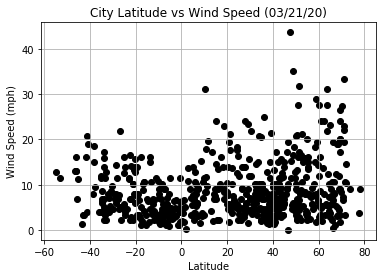

In [12]:
x_values = weather_data['Lat']
y_values = weather_data['Wind Speed']

fig4 = plt.figure()

plt.scatter(x_values,y_values, c='k', linewidths='1')
plt.title('City Latitude vs Wind Speed (03/21/20)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.show()

fig4.savefig("LatVsWind.png")

The code is ploting each city's latitude and wind speed on the specified date to show their relationship. The above figure shows that wind speed has a slightly positive correlation with latitude.

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [15]:
# Create Northern and Southern Hemisphere DataFrames
north_cond = (weather_data['Lat'] >= 0)
south_cond = (weather_data['Lat'] < 0)

north_data = weather_data[north_cond]
south_data = weather_data[south_cond]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

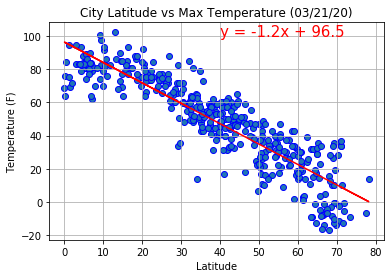

In [16]:
x_values = north_data['Lat']
y_values = north_data['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))

plt.scatter(x_values,y_values,linewidths='1',edgecolors='b')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40, 100),fontsize=15,color="red")
plt.title('City Latitude vs Max Temperature (03/21/20)')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid()
plt.show()
#print(f"{line_eq}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

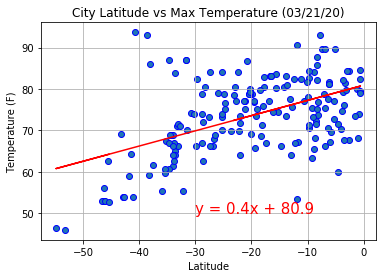

In [17]:
x_values = south_data['Lat']
y_values = south_data['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))

plt.scatter(x_values,y_values,linewidths='1',edgecolors='b')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30, 50),fontsize=15,color="red")
plt.title('City Latitude vs Max Temperature (03/21/20)')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid()
plt.show()
#print(f"{line_eq}")

Both regressions clearly show that temperature has an absolute negative correlation to latitude. So the closer to 0, the higher the temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

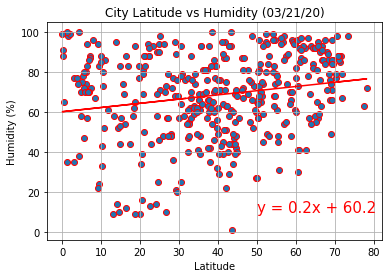

In [18]:
x_values = north_data['Lat']
y_values = north_data['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))

plt.scatter(x_values,y_values,linewidths='1',edgecolors='r')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50, 10),fontsize=15,color="red")
plt.title('City Latitude vs Humidity (03/21/20)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.show()
#print(f"{line_eq}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

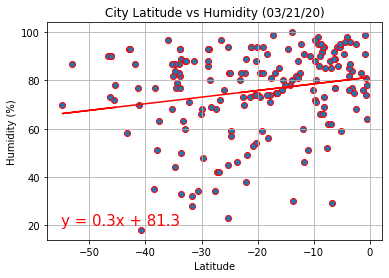

In [19]:
x_values = south_data['Lat']
y_values = south_data['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))

plt.scatter(x_values,y_values,linewidths='1',edgecolors='r')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55, 20),fontsize=15,color="red")
plt.title('City Latitude vs Humidity (03/21/20)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.show()
#print(f"{line_eq}")

The correlation between latitude and humidity is showing a slightly positive correlation, but it is small enough that it could probably be discounted.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

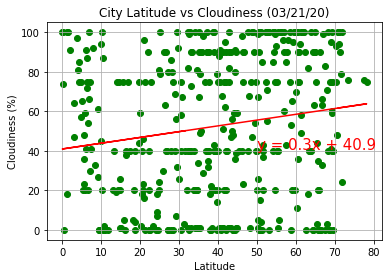

In [20]:
x_values = north_data['Lat']
y_values = north_data['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))

plt.scatter(x_values,y_values, c='g')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50, 41),fontsize=15,color="red")
plt.title('City Latitude vs Cloudiness (03/21/20)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.show()
#print(f"{line_eq}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

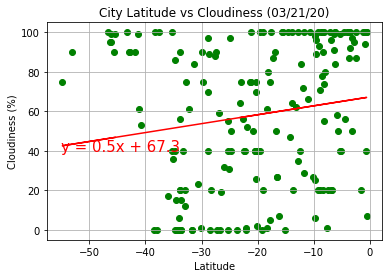

In [21]:
x_values = south_data['Lat']
y_values = south_data['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))

plt.scatter(x_values,y_values, c='g')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55, 40),fontsize=15,color="red")
plt.title('City Latitude vs Cloudiness (03/21/20)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.show()
#print(f"{line_eq}")

The correlation between latitude and cloudiness, similar to humidity (which makes sense, moisture in the air) is showing a slightly positive correlation, but it is small enough that it could probably be discounted.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

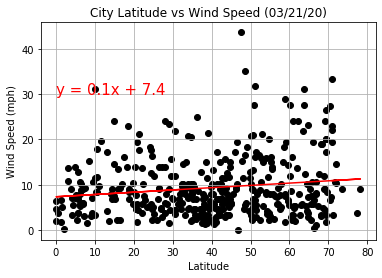

In [22]:
x_values = north_data['Lat']
y_values = north_data['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))

plt.scatter(x_values,y_values, c='k')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0, 30),fontsize=15,color="red")
plt.title('City Latitude vs Wind Speed (03/21/20)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.show()
#print(f"{line_eq}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

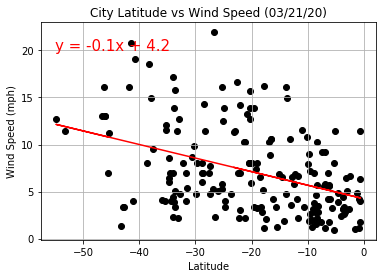

In [23]:
x_values = south_data['Lat']
y_values = south_data['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))

plt.scatter(x_values,y_values, c='k')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.title('City Latitude vs Wind Speed (03/21/20)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.show()
#print(f"{line_eq}")

Wind speed seems to have the opposite correlation to latitude as temperature, seeming to be slightly absolute positive, meaning that the further from 0 latitude, the greater the wind speed.